# Load and Explore the Dataset

- Import Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Load the Dataset:|

In [2]:
file_path = r"C:\Users\lenovo\Desktop\UM PROJECTS\customer_support_tickets.csv"  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display basic info about the dataset
print(data.info())

   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product setup   
1  Peripheral compatibil

- Check for Missing Values:

In [3]:
# Check for missing values
print(data.isnull().sum())

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64


# Data Preprocessing

- Handle Missing Values: 

In [4]:
# Drop rows with missing values
data = data.dropna()

# Verify no missing values remain
print(data.isnull().sum())
print("Remaining rows after dropping missing values:", len(data))

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
dtype: int64
Remaining rows after dropping missing values: 2769


- Encode Categorical Variables: 

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
print("Encoded Data Sample:\n", data.head())

Encoded Data Sample:
     Ticket ID  Customer Name  Customer Email  Customer Age  Customer Gender  \
2           3            519             844            48                2   
3           4            475             252            27                0   
4           5             34             251            67                0   
10         11           1297            1619            48                1   
11         12            290             580            51                1   

    Product Purchased  Date of Purchase  Ticket Type  Ticket Subject  \
2                  10               191            4               8   
3                  25               310            0               0   
4                   5                34            0               3   
10                 30               376            1               3   
11                 27               650            2              15   

    Ticket Description  Ticket Status  Resolution  Ticket Priority  \


- Check Processed Data:

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2769 entries, 2 to 8467
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     2769 non-null   int64  
 1   Customer Name                 2769 non-null   int32  
 2   Customer Email                2769 non-null   int32  
 3   Customer Age                  2769 non-null   int64  
 4   Customer Gender               2769 non-null   int32  
 5   Product Purchased             2769 non-null   int32  
 6   Date of Purchase              2769 non-null   int32  
 7   Ticket Type                   2769 non-null   int32  
 8   Ticket Subject                2769 non-null   int32  
 9   Ticket Description            2769 non-null   int32  
 10  Ticket Status                 2769 non-null   int32  
 11  Resolution                    2769 non-null   int32  
 12  Ticket Priority               2769 non-null   int32  
 13  Ticket C

# Exploratory Data Analysis(EDA)

- Check the Column Names:

In [8]:
# Check the column names in the dataset
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')


- Distribution of Target Variable:

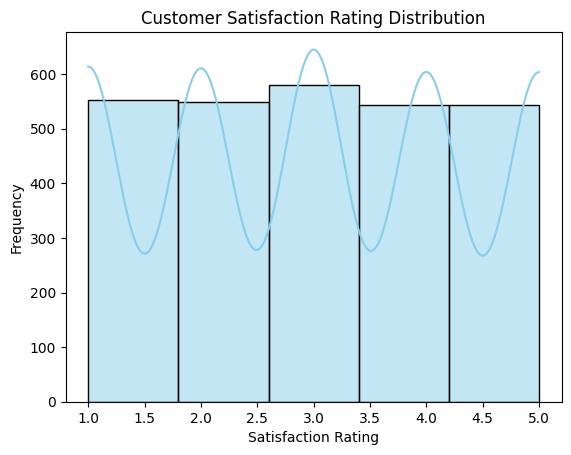

In [9]:
# Visualizing the distribution of the target variable (Customer Satisfaction Rating)
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True, color='skyblue')
plt.title('Customer Satisfaction Rating Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

- Correlation Heatmap:

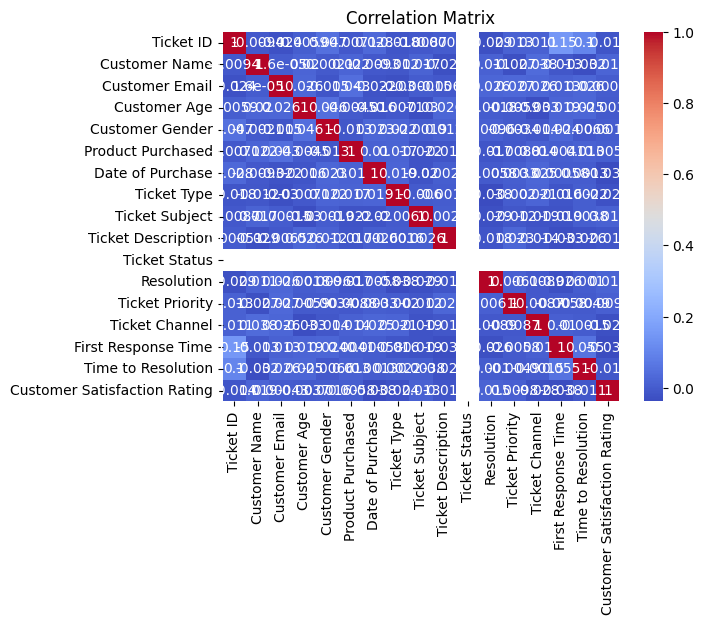

In [10]:
# Correlation heatmap to analyze feature relationships
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Patterns (Analyze Categorical Variables)
    - i. Ticket Type vs Satisfaction:

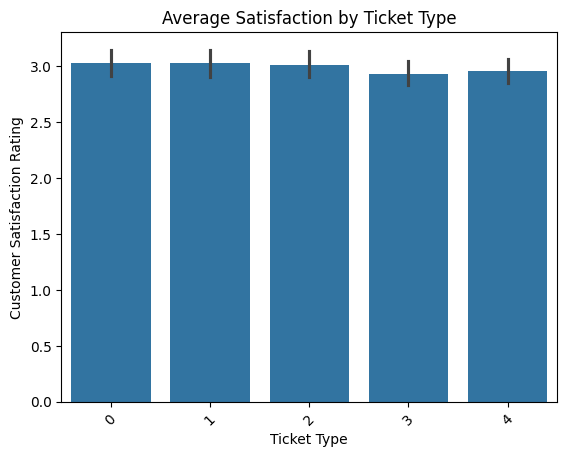

In [15]:
# Ticket Type vs Satisfaction
# Ticket Type vs Satisfaction without palette and hue
sns.barplot(x='Ticket Type', y='Customer Satisfaction Rating', data=data)
plt.title('Average Satisfaction by Ticket Type')
plt.xticks(rotation=45)
plt.show()

  - ii. Priority vs Satisfaction:

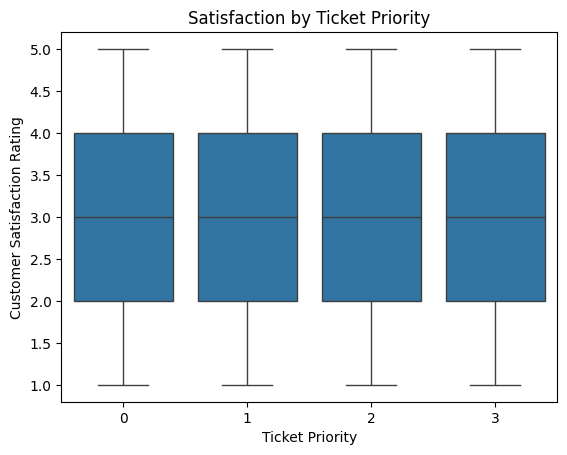

In [17]:
# Priority vs Satisfaction
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=data)
plt.title('Satisfaction by Ticket Priority')
plt.show()

#  Feature Engineering

- Define Features (X) and Target Variable (y):

In [18]:
# Define X (features) and y (target variable)
X = data.drop(['Ticket ID', 'Customer Satisfaction Rating'], axis=1)
y = data['Customer Satisfaction Rating']

- Split Data into Training and Testing Sets:

In [19]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1938, 15)
Testing set size: (831, 15)


# Feature Scaling

- Standardize Features:

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaled Features (Sample):\n", X_train[:5])

Scaled Features (Sample):
 [[ 0.11708192 -1.41918437  0.96330721  1.28205508 -1.06506062 -0.47471228
   1.35867431  0.94040379 -1.56059199  0.         -0.21831512 -1.31349499
   0.43870689 -0.09935098 -1.13267321]
 [-1.21054761  0.7946776  -0.35483822  0.04776658 -1.14567015  1.49672072
  -1.4507264   1.58356431 -1.0146068   0.         -0.27858108  0.46474692
   0.43870689  0.31600696 -0.40576232]
 [-0.91976996  1.34183938  1.62237993  0.04776658  1.51444416  1.60785543
  -0.74837622 -1.20346463  0.95145866  0.         -1.51528891 -0.42437404
  -0.46099042  0.42788356  1.64002719]
 [-0.89936451 -1.22881241 -0.61846731 -1.18652192 -1.46810824  1.47739295
   1.35867431  1.36917747 -0.79154396  0.         -1.06706079  1.35386787
  -0.46099042  0.47546327  0.58594274]
 [ 0.81724389 -0.52279721  0.83149267 -1.18652192  0.38591082 -1.21883161
  -1.4507264   0.08285642  1.29513105  0.          1.11130274 -0.42437404
  -1.36068772  0.98469468 -1.01173357]]


# Model Building

- Train a Random Forest Classifier:

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- Predict on Test Data:

In [23]:
# Predict on test set
y_pred = rfc.predict(X_test)

# Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.20577617328519857
Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.17      0.17       168
         2.0       0.24      0.22      0.23       174
         3.0       0.24      0.26      0.25       175
         4.0       0.19      0.17      0.18       162
         5.0       0.18      0.20      0.19       152

    accuracy                           0.21       831
   macro avg       0.21      0.20      0.20       831
weighted avg       0.21      0.21      0.21       831

Confusion Matrix:
 [[29 41 38 27 33]
 [42 38 34 27 33]
 [37 23 45 34 36]
 [31 27 36 28 40]
 [27 29 36 29 31]]


# Improve the Model

- a. Advanced Feature Engineering:

In [27]:
import pandas as pd

# Convert 'Date of Purchase' to datetime if not already in datetime format
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Create a new feature 'days_since_purchase'
data['days_since_purchase'] = (pd.Timestamp.now() - data['Date of Purchase']).dt.days

# Convert 'Ticket Description' to string (if not already)
data['Ticket Description'] = data['Ticket Description'].astype(str)

# Create a new feature 'description_length' which is the length of the ticket description
data['description_length'] = data['Ticket Description'].apply(len)

# Verify the new columns were added
print(data[['days_since_purchase', 'description_length']].head())

    days_since_purchase  description_length
2                 20106                   2
3                 20106                   3
4                 20106                   3
10                20106                   4
11                20106                   3


- b. Handle Class Imbalance:

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ensure 'Date of Purchase' is converted to datetime
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])

# Create 'days_since_purchase' as numeric feature
data['days_since_purchase'] = (pd.Timestamp.now() - data['Date of Purchase']).dt.days

# Drop the original 'Date of Purchase' column after converting it
data = data.drop('Date of Purchase', axis=1)

# Convert categorical columns to numeric using LabelEncoder
categorical_cols = data.select_dtypes(include=['object']).columns  # Identify categorical columns

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert and encode categorical columns

# Now, separate features (X) and target (y)
X = data.drop('Customer Satisfaction Rating', axis=1)  # All columns except the target
y = data['Customer Satisfaction Rating']  # The target column

# Apply SMOTE to balance the classes in the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the resampled data size
print(f"Original data size: {X.shape[0]} samples")
print(f"Resampled data size: {X_resampled.shape[0]} samples")

Original data size: 2769 samples
Resampled data size: 2900 samples


- Check the Column Names:

In [36]:
print(data.columns)

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Subject',
       'Ticket Description', 'Ticket Status', 'Resolution', 'Ticket Priority',
       'Ticket Channel', 'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating', 'days_since_purchase',
       'description_length'],
      dtype='object')


- c. Train an XGBoost Model:

XGBoost Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       553
         1.0       1.00      1.00      1.00       549
         2.0       1.00      1.00      1.00       580
         3.0       1.00      1.00      1.00       543
         4.0       1.00      1.00      1.00       544

    accuracy                           1.00      2769
   macro avg       1.00      1.00      1.00      2769
weighted avg       1.00      1.00      1.00      2769


Confusion Matrix:
[[553   0   0   0   0]
 [  0 549   0   0   0]
 [  0   0 580   0   0]
 [  0   0   0 543   0]
 [  0   0   0   0 544]]


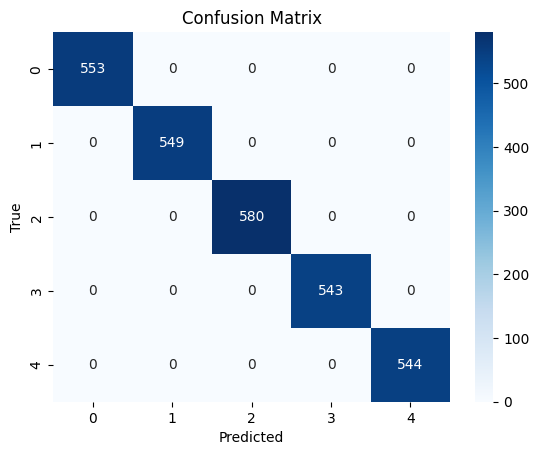

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Assuming 'data' is already cleaned and ready for modeling
# Label Encoding for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns  # Identify categorical columns
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))  # Convert and encode categorical columns

# Separate features (X) and target (y)
X = data.drop('Customer Satisfaction Rating', axis=1)  # All columns except the target
y = data['Customer Satisfaction Rating']  # The target column

# Adjust labels to match expected classes [0, 1, 2, 3, 4]
y = y - 1  # Subtract 1 from each label to shift range to [0, 1, 2, 3, 4]

# Apply SMOTE to balance the classes in the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Predict on the original data
y_pred_xgb = xgb_model.predict(X)

# Evaluate the model's performance
accuracy = accuracy_score(y, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy}")

# Classification report
print("\nClassification Report:")
print(classification_report(y, y_pred_xgb))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y, y_pred_xgb)
print(cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

- Visualize Feature Importance:

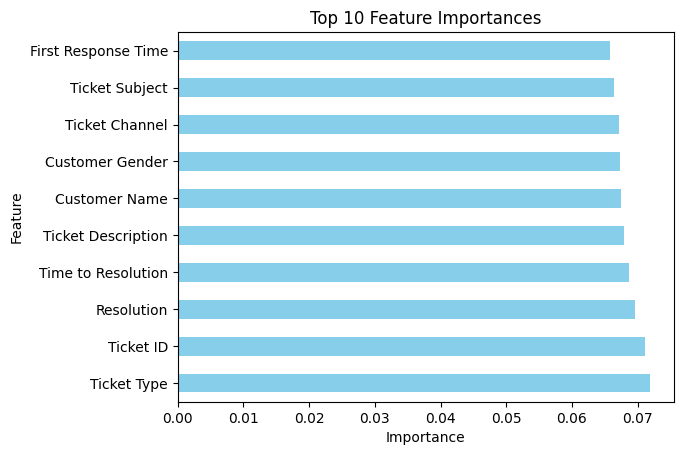

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the trained XGBoost model
importances = pd.Series(xgb_model.feature_importances_, index=X.columns)

# Plot the top 10 important features
importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()